In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style='whitegrid')

DATA_DIR = Path('../data/raw')

orders = pd.read_csv(DATA_DIR / 'orders.csv', parse_dates=['created_at'])
order_items = pd.read_csv(DATA_DIR / 'order_items.csv')
products = pd.read_csv(DATA_DIR / 'products.csv')
categories = pd.read_csv(DATA_DIR / 'categories.csv')
sessions = pd.read_csv(DATA_DIR / 'sessions.csv')

In [2]:
completed = orders[orders['status'] == 'completed'].copy()
completed['month'] = completed['created_at'].dt.to_period('M')

monthly = completed.groupby('month').agg(
    total_revenue=('total_amount', 'sum'),
    order_count=('id', 'count'),
    avg_order_value=('total_amount', 'mean')
).reset_index()

monthly['month_str'] = monthly['month'].astype(str)
monthly.head()

,month,total_revenue,order_count,avg_order_value,month_str
0,2024-02,23191.08,15,1546.072000,2024-02
1,2024-03,289163.87,162,1784.962160,2024-03
2,2024-04,332743.15,172,1934.553198,2024-04
3,2024-05,325366.42,179,1817.689497,2024-05
4,2024-06,331047.05,167,1982.317665,2024-06


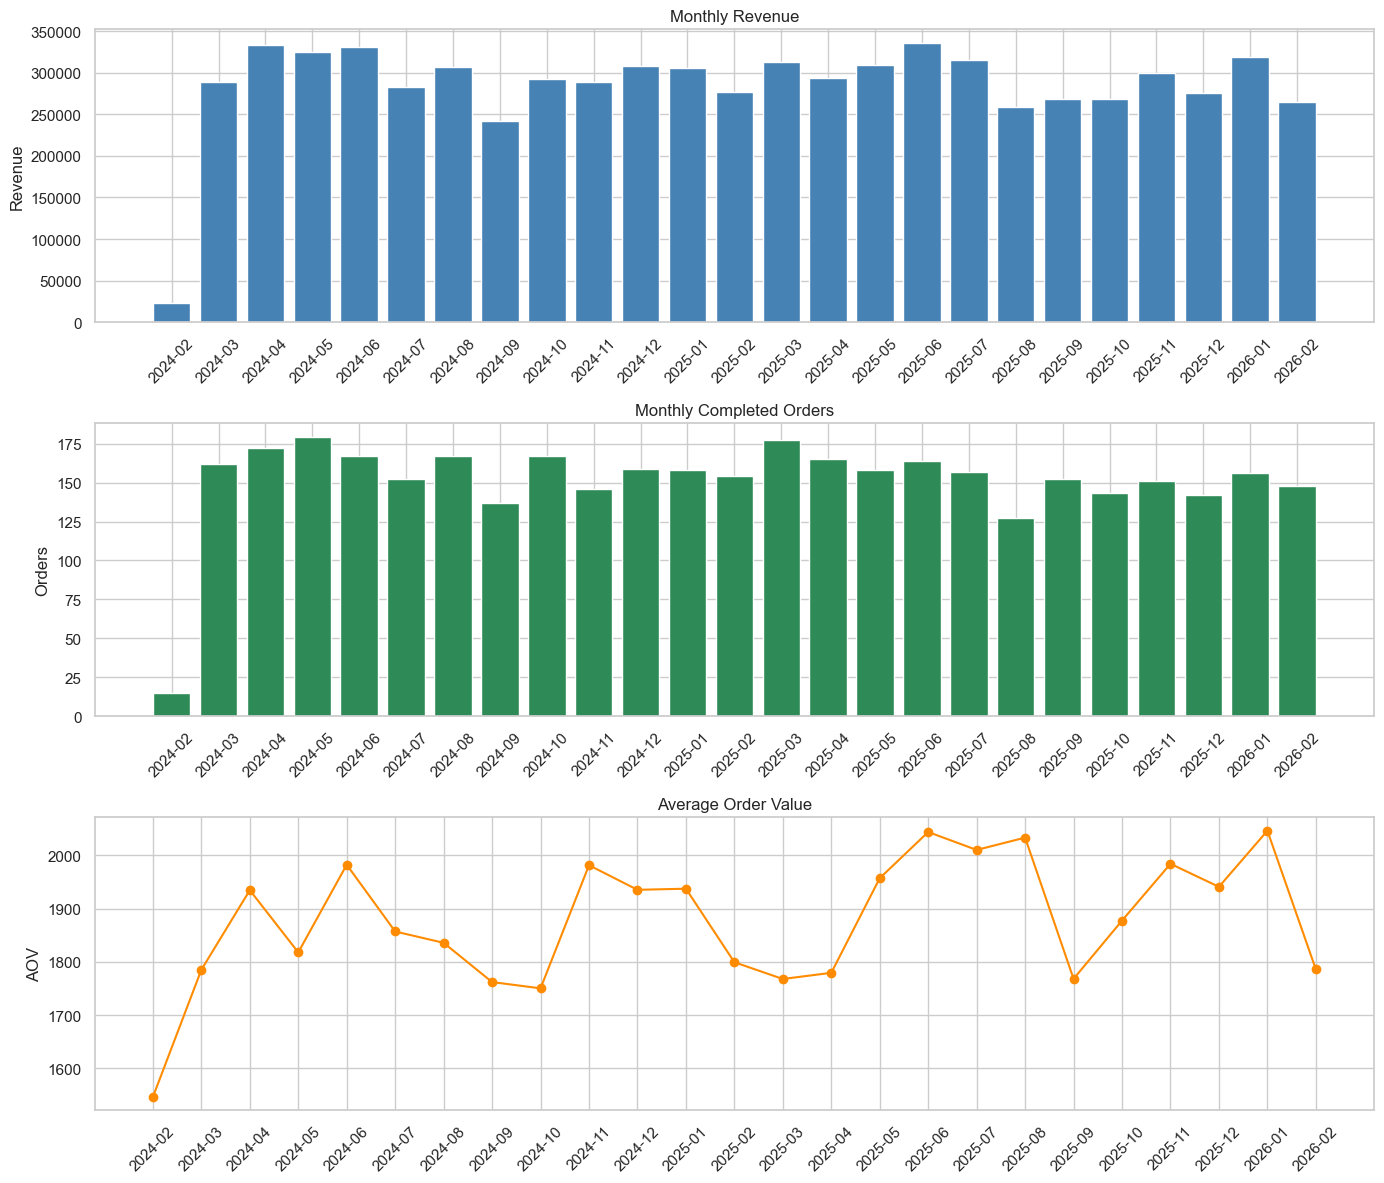

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

axes[0].bar(monthly['month_str'], monthly['total_revenue'], color='steelblue')
axes[0].set_title('Monthly Revenue')
axes[0].set_ylabel('Revenue')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(monthly['month_str'], monthly['order_count'], color='seagreen')
axes[1].set_title('Monthly Completed Orders')
axes[1].set_ylabel('Orders')
axes[1].tick_params(axis='x', rotation=45)

axes[2].plot(monthly['month_str'], monthly['avg_order_value'], marker='o', color='darkorange')
axes[2].set_title('Average Order Value')
axes[2].set_ylabel('AOV')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../data/processed/revenue_kpis.png', dpi=150)
plt.show()

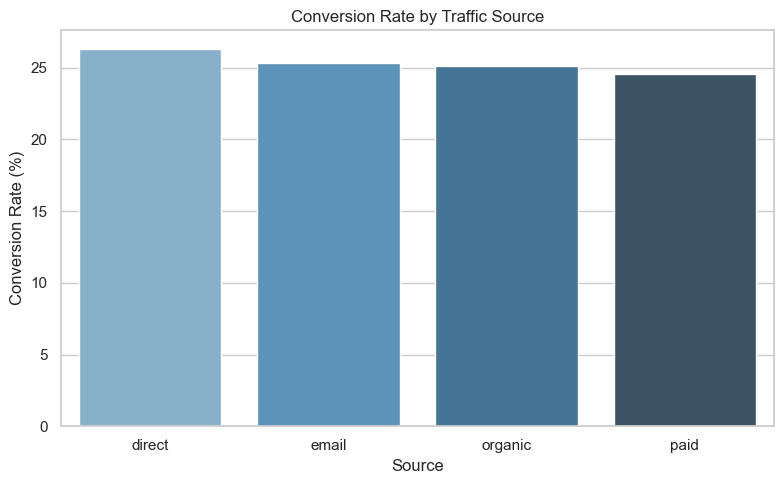

,source,total_sessions,conversions,conversion_rate_pct
0,direct,1225,322,26.29
1,email,1221,309,25.31
2,organic,3134,787,25.11
3,paid,2420,595,24.59


In [4]:
conversion = sessions.groupby('source').agg(
    total_sessions=('id', 'count'),
    conversions=('converted', 'sum')
).reset_index()

conversion['conversion_rate_pct'] = (conversion['conversions'] / conversion['total_sessions'] * 100).round(2)

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=conversion, x='source', y='conversion_rate_pct', hue='source', legend=False, palette='Blues_d', ax=ax)
ax.set_title('Conversion Rate by Traffic Source')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xlabel('Source')
plt.tight_layout()
plt.savefig('../data/processed/conversion_by_source.png', dpi=150)
plt.show()

conversion